# Logistic Regression: Classification

## Hypothesis Model
We want $0\leq h_{\theta}(x)\leq1$

For linear regression, we have $h_{\theta}(x)=\theta^Tx$, we now change it to $h_{\theta}(x)=g(\theta^Tx)$ while $g(z)=\frac{1}{1+e^{-z}}$. 

The hypothesis function for logistic regression becomes: 
$$ h_{\theta}(x)=\frac{1}{1+e^{-\theta^Tx}} $$
This is also called sigmoid function. 

## Interpretation of hypothesis output
$h_{\theta}(x)$ = estimated probability that $y=1$ on input $x$

Example: if $x = \begin{bmatrix}x_0\\x_1\end{bmatrix}=\begin{bmatrix}1 \\ Precipitation~Level\end{bmatrix}$ and $h_{\theta}(x)=0.7$, this tells 70% chance of flooding. 

$h_{\theta}(x) = P(y=1|x;\theta)$ means "probability that $y=1$, given $x$, parameterized by $\theta$". 

$$ P(y=0|x;\theta)+P(y=1|x;\theta)=1 $$
$$ P(y=0|x;\theta)=1-P(y=1|x;\theta) $$

## Decision Boundary
suppose predict $y=1$ if $h_{\theta}(x)\geq0.5$, that is, $g(z)\geq0.5$ when $z\geq0$, i.e. $\theta^Tx\geq0$

predict $y=0$ if $h_{\theta}(x)<0.5$, that is, $g(z)<0.5$ when $z<0$, i.e. $\theta^Tx<0$

### Linear decision boundary
$h_{\theta}(x) = g(\theta_0+\theta_1x_1+\theta_2x_2)$

Say $\theta = \begin{bmatrix}-3 \\ 1 \\ 1\end{bmatrix}$

Predict $y=1$ if $-3+x_1+x_2\geq0$

meaning: $y=1$, if $\begin{bmatrix}-3 & 1 & 1\end{bmatrix}\begin{bmatrix}1 \\ x_1 \\ x_2\end{bmatrix}\geq0$

### Non-linear decision boundary
$h_{\theta}(x) = g(\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_1^2+\theta_4x_2^2)$

Say $\theta = \begin{bmatrix}-1 \\ 0 \\ 0 \\ 1\\ 1\end{bmatrix}$

Predict $y=1$ if $-1+x_1^2+x_2^2\geq0$

## Cost Function
without regularization:
$$ J(\theta)=-\frac{1}{m}\left[\sum\limits_{i=1}^my^{(i)}\log h_{\theta}(x^{(i)})+(1-y^{(i)})\log(1-h_{\theta}(x^{(i)}))\right] $$
with regularization
$$ J(\theta)=-\frac{1}{m}\left[\sum\limits_{i=1}^my^{(i)}\log h_{\theta}(x^{(i)})+(1-y^{(i)})\log(1-h_{\theta}(x^{(i)}))\right]+\frac{\lambda}{2m}\sum\limits_{j=1}^n\theta_j^2 $$
To fit parameters $\theta$
$$ \underset{\theta}{min}J(\theta) $$
To make a prediction given new $x$:
$$ h_{\theta}(x)=\frac{1}{1+e^{-\theta^Tx}} $$

## Gradient Descent
without regularization:
$$ \theta_j := \theta_j - \alpha\sum\limits_{i=1}^m(h_{\theta}(x^{(i)}))-y^{(i)})x_j^{(i)} $$
(simultaneously update for all $\theta_j$)

with regularization:
$$ \theta_j := \theta_j - \alpha\sum\limits_{i=1}^m(h_{\theta}(x^{(i)}))-y^{(i)})x_j^{(i)}-\frac{\lambda}{m}\theta_j $$
except that 
$$ \theta_0 := \theta_j - \alpha\sum\limits_{i=1}^m(h_{\theta}(x^{(i)}))-y^{(i)})x_j^{(i)} $$
(simultaneously update for all $\theta_j$)

## Error Analysis

| | Actual 1 | Actual 0 |
|-|-|-|
|Predicted 1|True positive|False positive|
|Predicted 0|False negative|True negative|

### Precision
Of all cases we predicted $y=1$, what fraction actually is positive? 
$$ precision = \frac{true~positives}{no.~of~predicted~positives}=\frac{true~pos}{true~pos+false~pos} $$
Only looking at precision can be problematic. Consider we have a high skewed data of precipitation level vs. flooding. Since flooding is a rare case, if a model only predicts non-flooding, it might have a better precision than other models. However, such model is not useful. 

### Recall
Of all cases that are actually positive, what fraction did we correctly detect as positive? 
$$ recall = \frac{true~positive}{no.~of~actual~positives}=\frac{true~pos}{true~pos+false~neg} $$

### Trading off precision and recall
Logistic regression: $0\leq h_{\theta}(x)\leq1$
- Predict 1 if $h_{\theta}(x)\geq0.5$
- Predict 0 if $h_{\theta}(x)<0.5$

Suppose we want to predict $y=1$ (flooding) only if very confident:
- Predict 1 if $h_{\theta}(x)\geq0.7~or~0.9$
- Higher precision, lower recall

Suppose we want to avoid missing too many cases of flooding (avoid false negatives):
- Predict 1 if $h_{\theta}(x)\geq0.3$
- Higher recall, lower precision

***More generally: Predict 1 if $h_{\theta}(x)\geq threshold$***

### $F_1$ Score (F score)
How to compare precision/recall numbers? 

| | Precision (P) | Recall (R) |
|-|-|-|
|Algorithm 1|0.5|0.4|
|Algorithm 2|0.7|0.1|
|Algorithm 3|0.02|1.0|

The method of averaging ($\frac{P+R}{2}$) does not work. 

$$ F_1~Score = 2\frac{PR}{P+R} $$
- If P = 0 or R=0, F score = 0
- If P = 1 and R=1, F score = 1


In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [10]:
df = pd.read_csv('../data/log_reg_data.csv') # update the link
df.rename(columns={'# x1':'x1'},inplace=True)
x1 = df['x1'].to_numpy().reshape(50,1)
x2 = df['x2'].to_numpy().reshape(50,1)
Y = df['y'].to_numpy().reshape(50,1)

In [3]:
# data processing on the features - adding an x0 feature with all ones
x0 = np.ones(50)

#construct a features array X
X = np.hstack((x0,x1,x2))

46 : [[-8.48766659]
 [ 0.8987143 ]
 [ 0.85128945]] 0.299247293677515 [4.992711472348108, 4.740645020551543, 4.495151808372468, 4.256328753071179, 4.0243098339940175, 3.7992639095030403, 3.5813887792016375, 3.3709000245784706, 3.1680139750568714, 2.972925812771713, 2.785785905071966, 2.606679046716928, 2.4356114297662126, 2.2725084061780345, 2.117223048235742, 1.9695525681475607, 1.8292582328931868, 1.6960849754955283, 1.5697787878545264, 1.450101926633648, 1.3368469100325475, 1.2298498466039987, 1.129002167519104, 1.0342581521542331, 0.9456346693996307, 0.8632000359238126, 0.7870511183554041, 0.7172813581982512, 0.6539459378934996, 0.5970319608665675, 0.5464400296437081, 0.5019794733619765, 0.4633748955125624, 0.4302791028373556, 0.4022877904816059, 0.3789536213844212, 0.3597996582241222, 0.34433312509041736, 0.33206006452095094, 0.32250038375441586, 0.31520193724936246, 0.3097521169479248, 0.30578585422181614, 0.3029896493612571, 0.30110191304350553, 0.29991034904621006]


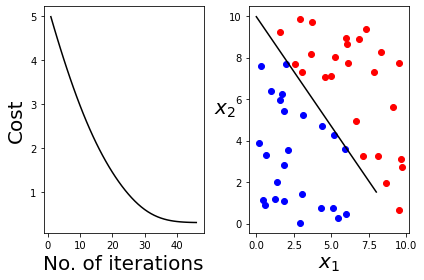

In [4]:
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.plot(iter,cost,'k-')
ax1.set_xlabel('No. of iterations',fontsize=20)
ax1.set_ylabel('Cost',fontsize=20)
ax2.scatter(x1[g1],x2[g1],c='r')
ax2.scatter(x1[g0],x2[g0],c='b')
ax2.plot(np.arange(int(np.max(x1))),(w[0,0]+w[1,0]*np.arange(int(np.max(x1))))/-w[2,0],'k-')
ax2.set_xlabel('$x_1$',fontsize=20)
ax2.set_ylabel('$x_2$',rotation=0, fontsize=20)
plt.tight_layout()
print(m,':',w,c,cost)

In [5]:
# Precison, Recall, and F_Score calculations
 
print('P=',P,'R=',R,'F1=',F1)

P= 1.0 R= 1.0 F1= 1.0
